# Homework #2

### Megan Sapack

## Part 1
Replace photo on wall with picture 2 

-Compute H matrix that defines transform between 2 images

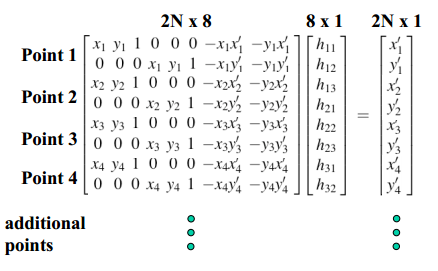

In [1]:
import numpy as np
import matplotlib.pyplot as plot

import cv2

<IPython.core.display.Javascript object>


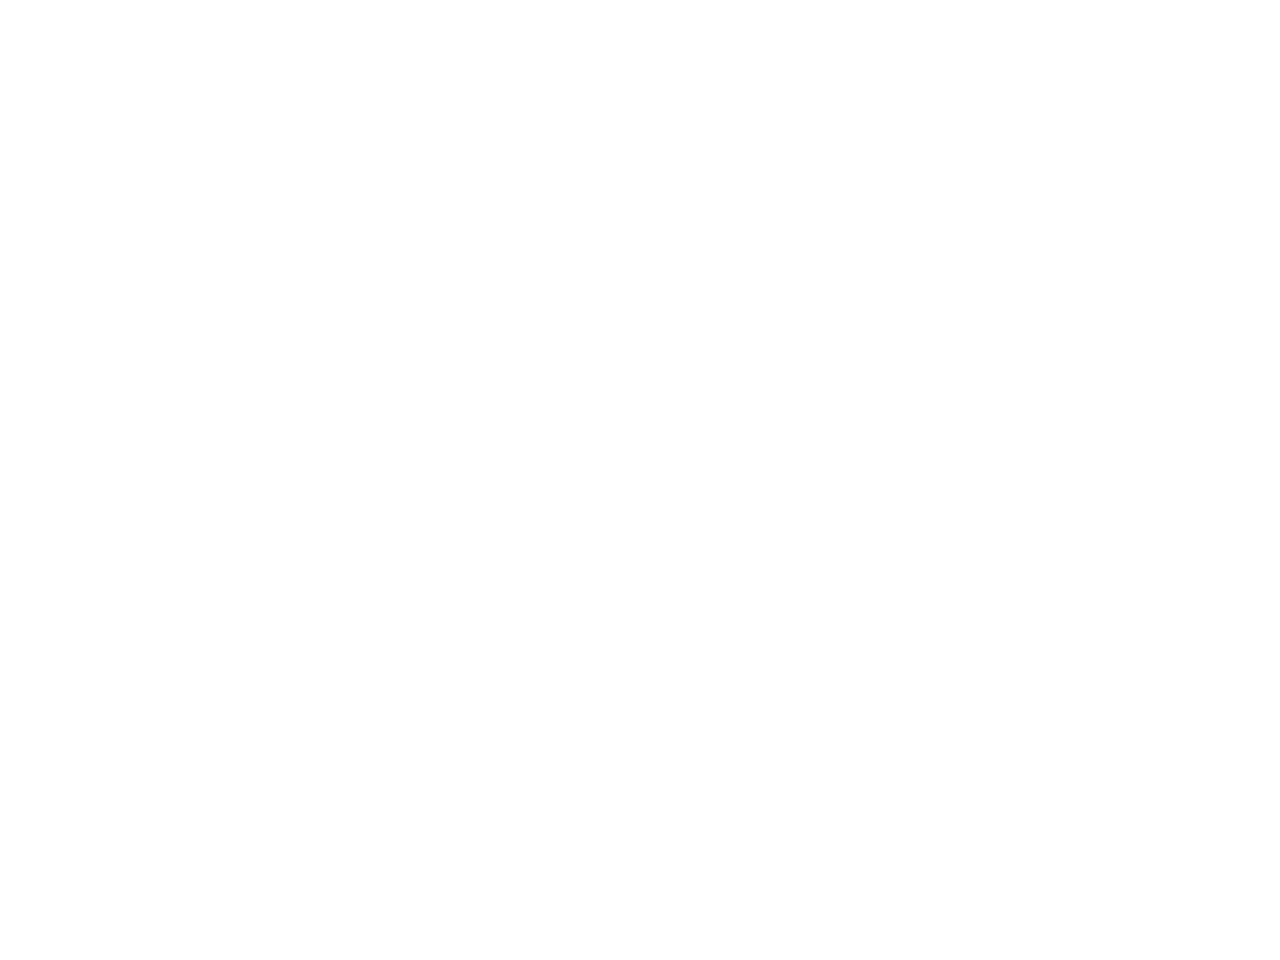

In [2]:
img2 = plot.imread('r1.png')
img1 = plot.imread('r2.png')

%matplotlib notebook

plot.figure(1)
plot.imshow(img1)

<IPython.core.display.Javascript object>


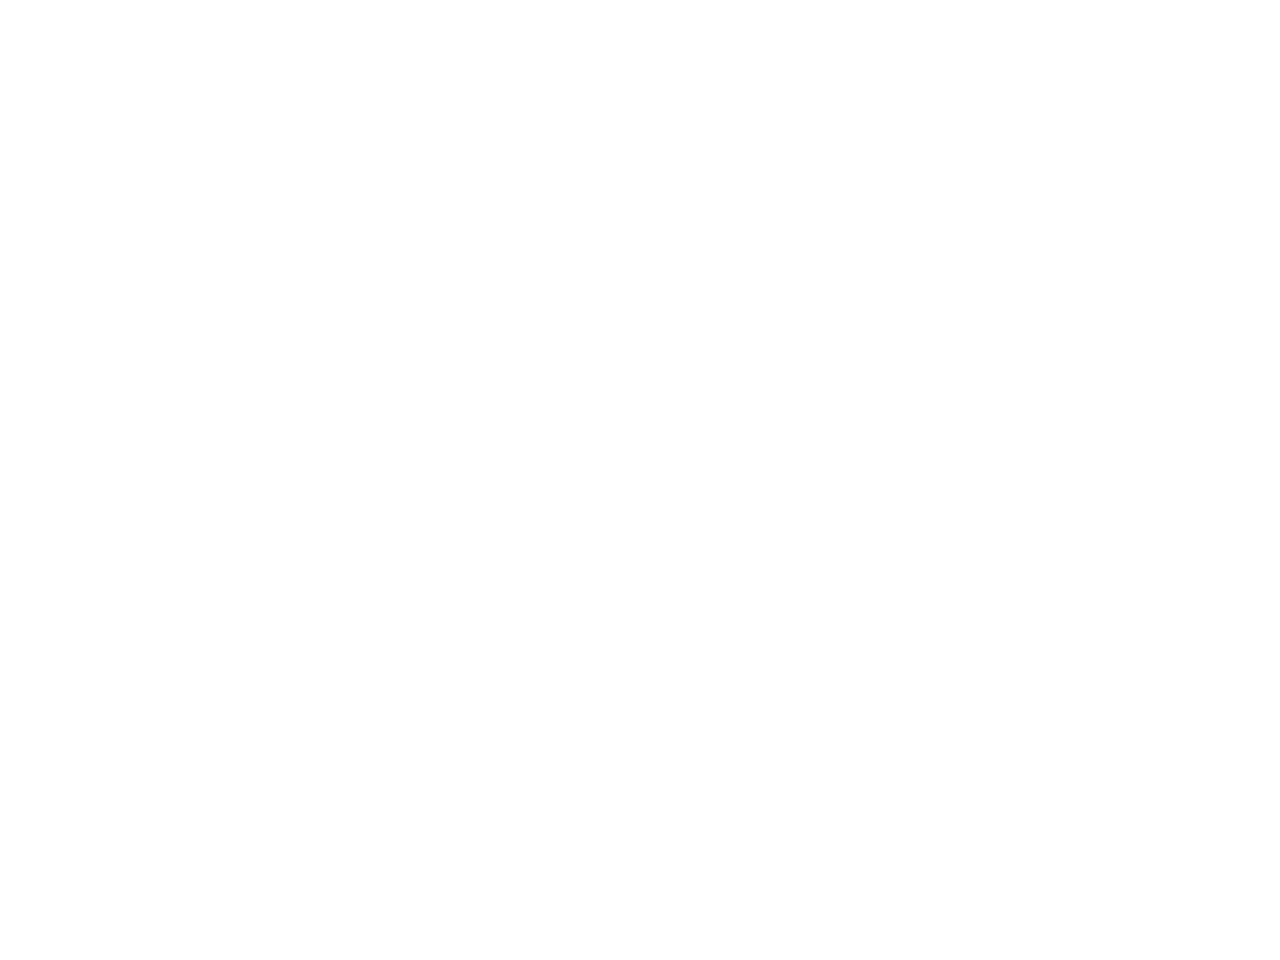

In [3]:
%matplotlib notebook

plot.figure(2)
plot.imshow(img2)

In [4]:
%matplotlib inline

pts_src = np.array([(0,0),(446,0),(446,450),(0,450)])
pts_dst = np.array([(541,506), (925,474),(958,1157),(573,1099)])


In [5]:
# 8xn matrix - n is number of points
#P = p matrix PH=0
#H = h matrix [h1,h2,h3,h4]

# 4 points for part 1
n = len(pts_src)

# A is a 8x8 matrix, B is an 8x1 matrix
#A = np.zeros((n*2, 8))
#B = np.zeros((n*2, 1))
a = np.zeros((n*2,8))
#a = None
b = np.zeros((n*2,1))

def a_matrix(a,b,n,pts_src,pts_dst):
    
    for i in range(0,n):
        row_ai = np.array([pts_src[i][0],pts_src[i][1],1,0,0,0,-pts_src[i][0]*pts_dst[i][0],-pts_src[i][1]*pts_dst[i][0]])
        if i == 0:
            a = row_ai
        else:
            a = np.vstack([a,row_ai])
        
        row_ai2 = np.array([0,0,0,pts_src[i][0],pts_src[i][1],1,-pts_src[i][0]*pts_dst[i][1],-pts_src[i][1]*pts_dst[i][1]])       
        a = np.vstack([a,row_ai2])
        
        row_bi = np.array([pts_dst[i][0]])
        if i == 0:
            b = row_bi
        else:
            b = np.vstack([b,row_bi])
        
        row_bi2 = np.array([pts_dst[i][1]])
        b = np.vstack([b,row_bi2])
        
    return a,b
# H = np.linalg.lstsq(A,B)
#im_out = cv2.warpPerspective(im_src, h,(im_dst.shape[1],im_dst.shape[0]))


In [6]:
A,B = a_matrix(a,b,n,pts_src,pts_dst)
print(A)
print(B)

[[      0       0       1       0       0       0       0       0]
 [      0       0       0       0       0       1       0       0]
 [    446       0       1       0       0       0 -412550       0]
 [      0       0       0     446       0       1 -211404       0]
 [    446     450       1       0       0       0 -427268 -431100]
 [      0       0       0     446     450       1 -516022 -520650]
 [      0     450       1       0       0       0       0 -257850]
 [      0       0       0       0     450       1       0 -494550]]
[[ 541]
 [ 506]
 [ 925]
 [ 474]
 [ 958]
 [1157]
 [ 573]
 [1099]]


In [7]:
H = np.linalg.lstsq(A,B,rcond=None)
H = H[0]
H = np.append(H,[1])
H = np.resize(H,(3,3))
print(H)

H_test = cv2.findHomography(pts_src,pts_dst)
print(H_test)

# add 1 as H33 and then resize to a 3x3 H matrix


[[ 5.86150419e-01  8.22668811e-02  5.41000000e+02]
 [-2.12583825e-01  1.33917427e+00  5.06000000e+02]
 [-2.97120139e-04  1.94690574e-05  1.00000000e+00]]
(array([[ 5.86150419e-01,  8.22668810e-02,  5.41000000e+02],
       [-2.12583825e-01,  1.33917427e+00,  5.06000000e+02],
       [-2.97120139e-04,  1.94690574e-05,  1.00000000e+00]]), array([[1],
       [1],
       [1],
       [1]], dtype=uint8))


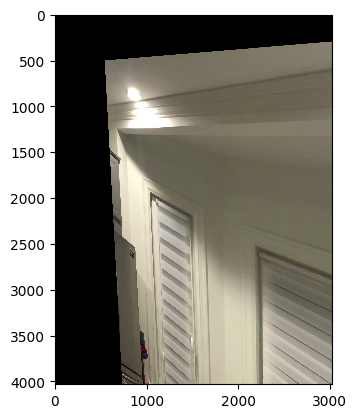

In [8]:
im_out = cv2.warpPerspective(img1, H,(img2.shape[1],img2.shape[0]))

plot.imshow(im_out)

(4032, 3024)

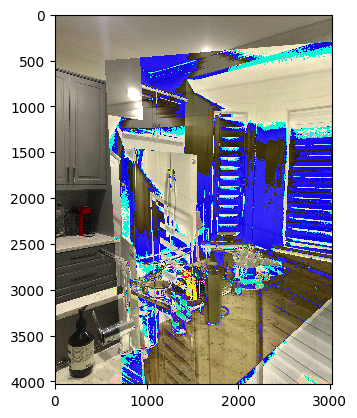

In [9]:
import numpy.ma as ma

#plot.imshow()

cv2.fillConvexPoly(img2, pts_dst, 0, 16);

img_full = img2 + im_out;
plot.imshow((img_full * 255).astype(np.uint8))
#plot.imshow(img_full)
#cv2.imshow('image',img_full)


#for p in im_out
    
im_outgray = cv2.cvtColor(im_out,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(im_outgray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

mask_inv.shape

#img2.shape

In [10]:
mask_inv = mask.astype(np.int8)
#img_bg = cv2.bitwise_and(img2,img2,mask = mask_inv)

img_fg = cv2.bitwise_and(im_out,im_out,mask = mask)

img_full = cv2.add(img2,img_fg)
plot.imshow(img_full)

error: OpenCV(4.0.0) /Users/travis/build/skvark/opencv-python/opencv/modules/core/src/arithm.cpp:245: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


## Part 2 

8 points for the homography

In [11]:
pts_src = np.array([(0,0),(223,0),(446,0),(446,225),(446,450),(223,450),(0,450),(0,225)])
pts_dst = np.array([(541,506),(725,492),(925,474),(945,831),(958,1157),(765,1122),(573,1099),(553,811)])

In [12]:
# 8 points for part 2
n = len(pts_src)

# A is a 8x8 matrix, B is an 8x1 matrix
#A = np.zeros((n*2, 8))
#B = np.zeros((n*2, 1))
a = np.zeros((n*2,8))
#a = None
b = np.zeros((n*2,1))

A,B = a_matrix(a,b,n,pts_src,pts_dst)
print(A)

[[      0       0       1       0       0       0       0       0]
 [      0       0       0       0       0       1       0       0]
 [    223       0       1       0       0       0 -161675       0]
 [      0       0       0     223       0       1 -109716       0]
 [    446       0       1       0       0       0 -412550       0]
 [      0       0       0     446       0       1 -211404       0]
 [    446     225       1       0       0       0 -421470 -212625]
 [      0       0       0     446     225       1 -370626 -186975]
 [    446     450       1       0       0       0 -427268 -431100]
 [      0       0       0     446     450       1 -516022 -520650]
 [    223     450       1       0       0       0 -170595 -344250]
 [      0       0       0     223     450       1 -250206 -504900]
 [      0     450       1       0       0       0       0 -257850]
 [      0       0       0       0     450       1       0 -494550]
 [      0     225       1       0       0       0       0 -124

In [13]:
H = np.linalg.lstsq(A,B,rcond=None)

H = H[0]
H = np.append(H,[1])
H = np.resize(H,(3,3))
print(H)

H_test = cv2.findHomography(pts_src,pts_dst)
print(H_test)


[[ 6.17097185e-01  1.39413486e-01  5.37499730e+02]
 [-1.96616059e-01  1.41624311e+00  5.05506942e+02]
 [-2.83898571e-04  8.70296175e-05  1.00000000e+00]]
(array([[ 6.16466113e-01,  1.46539301e-01,  5.37292207e+02],
       [-1.96628777e-01,  1.42580439e+00,  5.05122311e+02],
       [-2.84421450e-04,  9.48989926e-05,  1.00000000e+00]]), array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8))


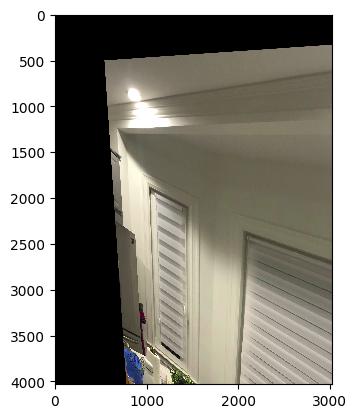

In [14]:
im_out = cv2.warpPerspective(img1, H,(img2.shape[1],img2.shape[0]))

plot.imshow(im_out)

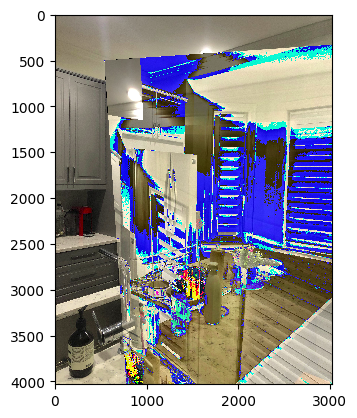

In [15]:
cv2.fillConvexPoly(img2, pts_dst, 0, 16);

img_full = img2 + im_out;
plot.imshow((img_full * 255).astype(np.uint8))

# Part 3 - MOSAIC

Take 5 images, calculate homography and then stitch images together

In [16]:
img_center = plot.imread('r1.png')
img_right1 = plot.imread('r1.png')
img_right2 = plot.imread('r2.png')
img_left1 = plot.imread('r2.png')
img_left2 = plot.imread('r2.png')

img_center = cv2.resize(img_center, (0,0), fx=0.1, fy=0.1)
img_right1 = cv2.resize(img_right1, (0,0), fx=0.1, fy=0.1)
img_right2 = cv2.resize(img_right2, (0,0), fx=0.1, fy=0.1)
img_left1 = cv2.resize(img_left1, (0,0), fx=0.1, fy=0.1)
img_left2 = cv2.resize(img_left2, (0,0), fx=0.1, fy=0.1)


In [17]:
print(img_right1.shape)

(403, 302, 3)


<IPython.core.display.Javascript object>


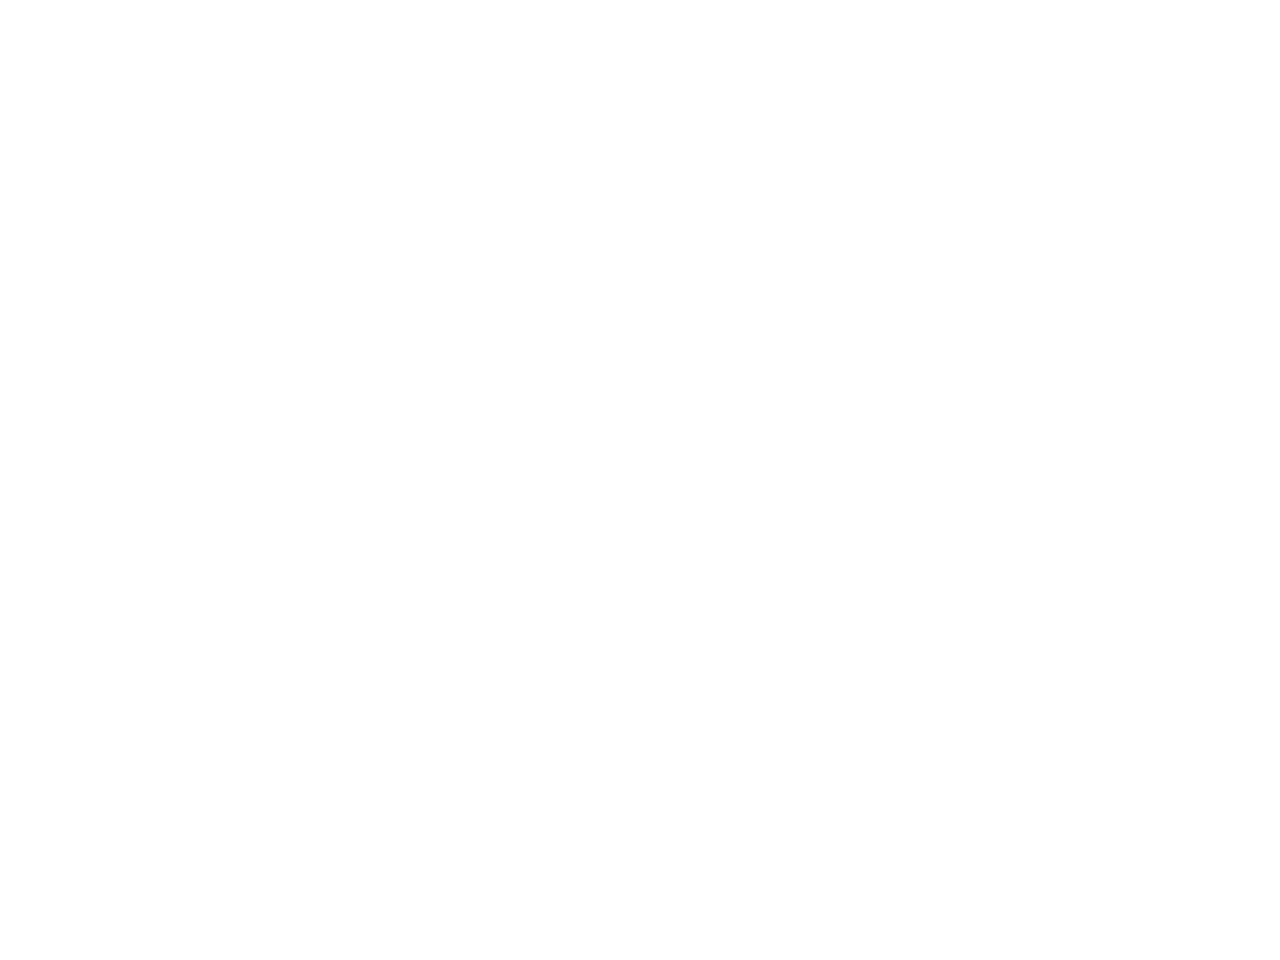

In [18]:
%matplotlib notebook

#plot.figure(1)
#plot.imshow(img_left2)
#plot.figure(2)
#plot.imshow(img_left1)
#plot.figure(3)
#plot.imshow(img_right1)
plot.figure(1)
plot.imshow(img_right1)

<IPython.core.display.Javascript object>


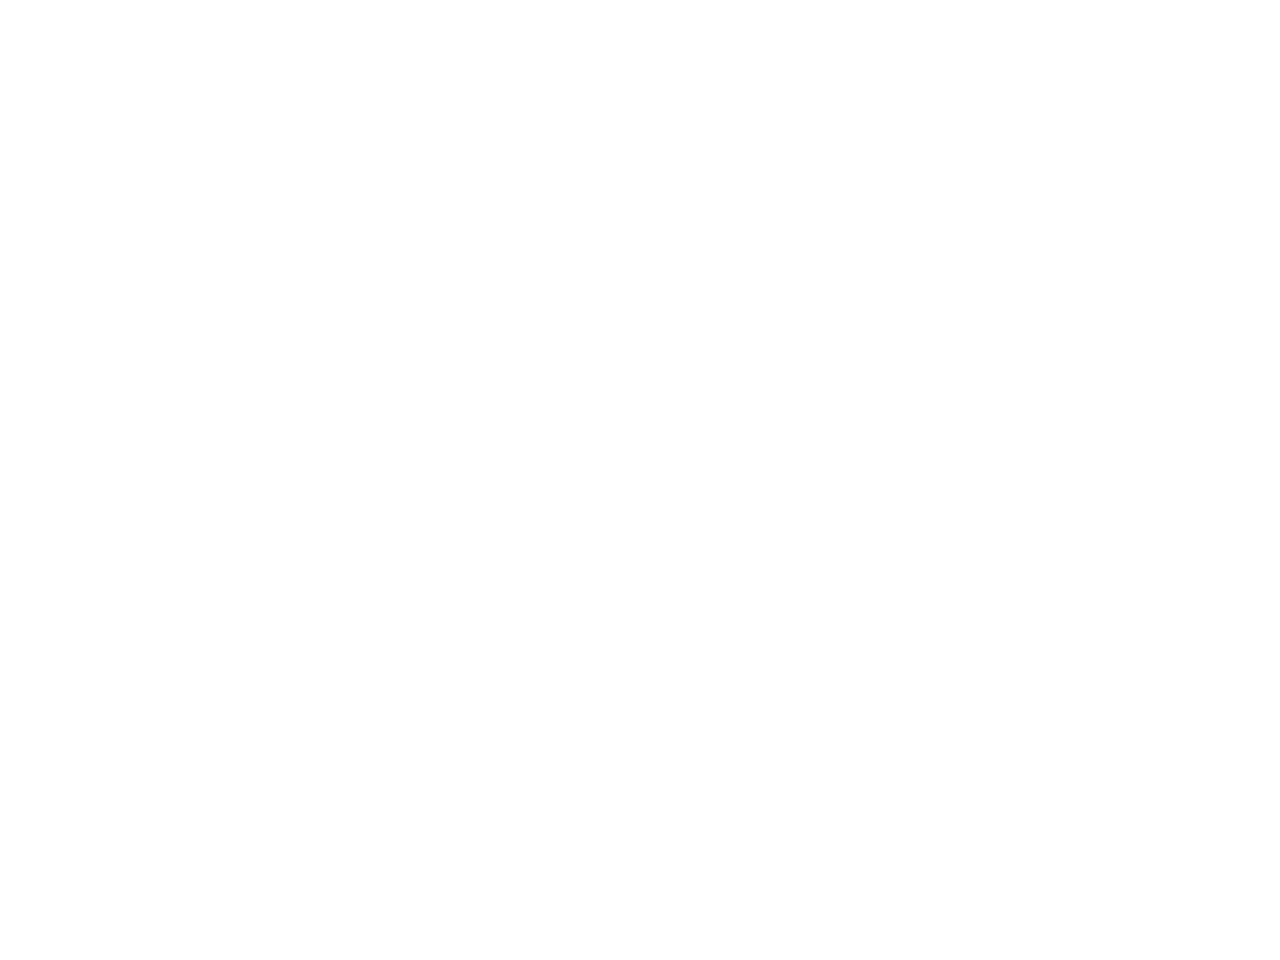

In [19]:
%matplotlib notebook

plot.figure(5)
plot.imshow(img_right2)

In [20]:
pts_R2 = np.array([(50,100),(131,106),(129,247),(28,254)])
pts_R1 = np.array([(173,106),(256,108),(251,257),(154,253)])

pts_CR1 = np.array([(168,75),(239,90),(248,152),(156,258)])
pts_R11 = np.array([(71,71),(140,94),(153,156),(51,258)])

pts_CL1 = np.array([(29,55),(205,83),(164,242),(6,273)])
pts_L11 = np.array([(101,81),(273,94),(233,257),(80,280)])

pts_L2 = np.array([(155,80),(287,70),(286,273),(161,283)])
pts_L1 = np.array([(7,78),(143,84),(143,271),(23,294)])

# initial shape of destination center image that we are projecting onto 
center_h, center_w, center_c = img_center.shape 

In [21]:
def test_points(img, points):
    plot.figure()
    plot.imshow(img)
    colors = ['green', 'red', 'blue', 'yellow']
    i = 0;
    for pt in points:
        plot.plot(pt[0], pt[1], color=colors[i%len(colors)], marker='+', linewidth=2, markersize=10)
        i+=1

<IPython.core.display.Javascript object>


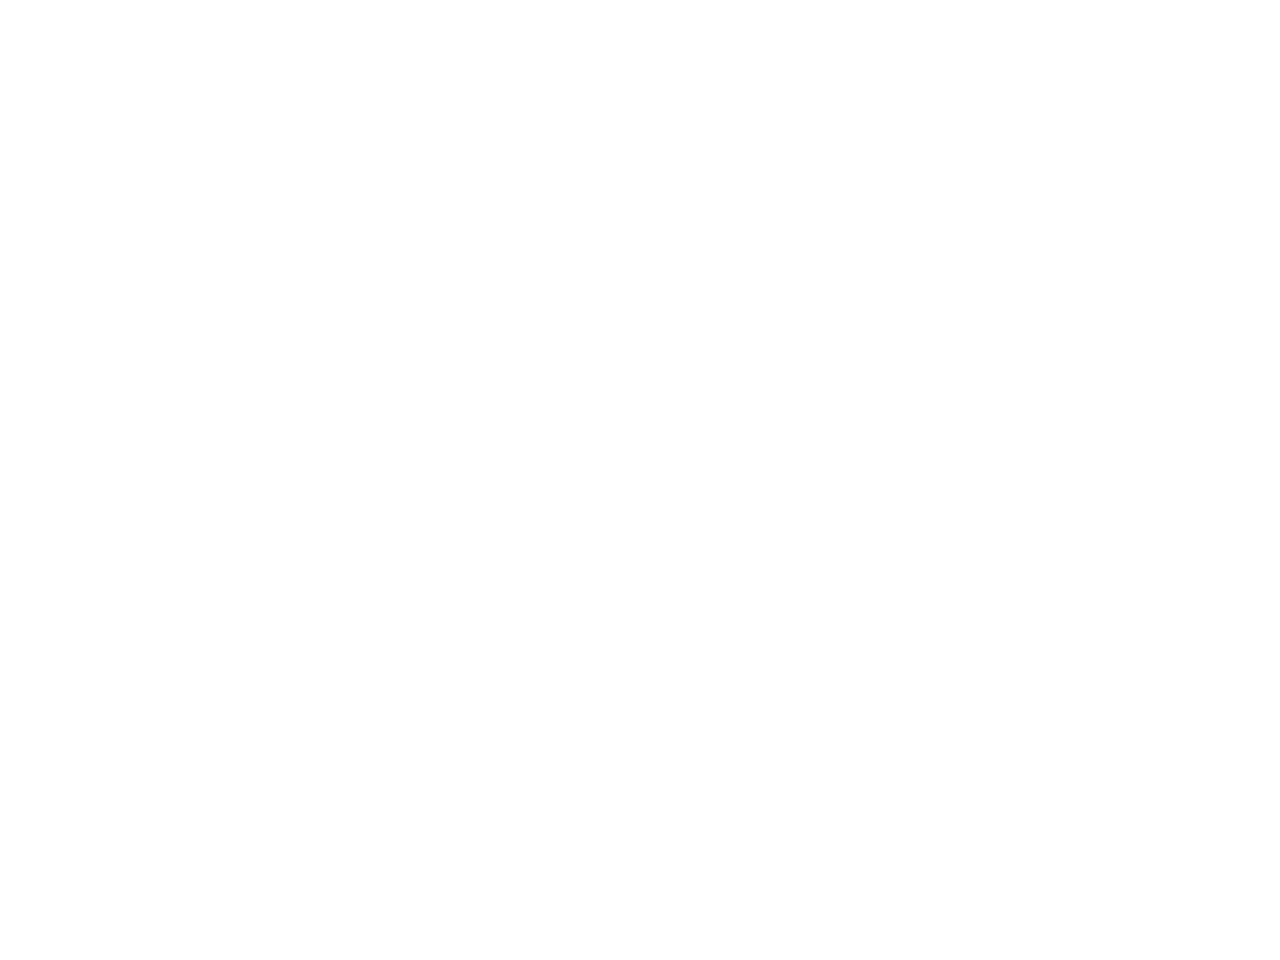

In [22]:
test_points(img_right1,pts_R1)

<IPython.core.display.Javascript object>


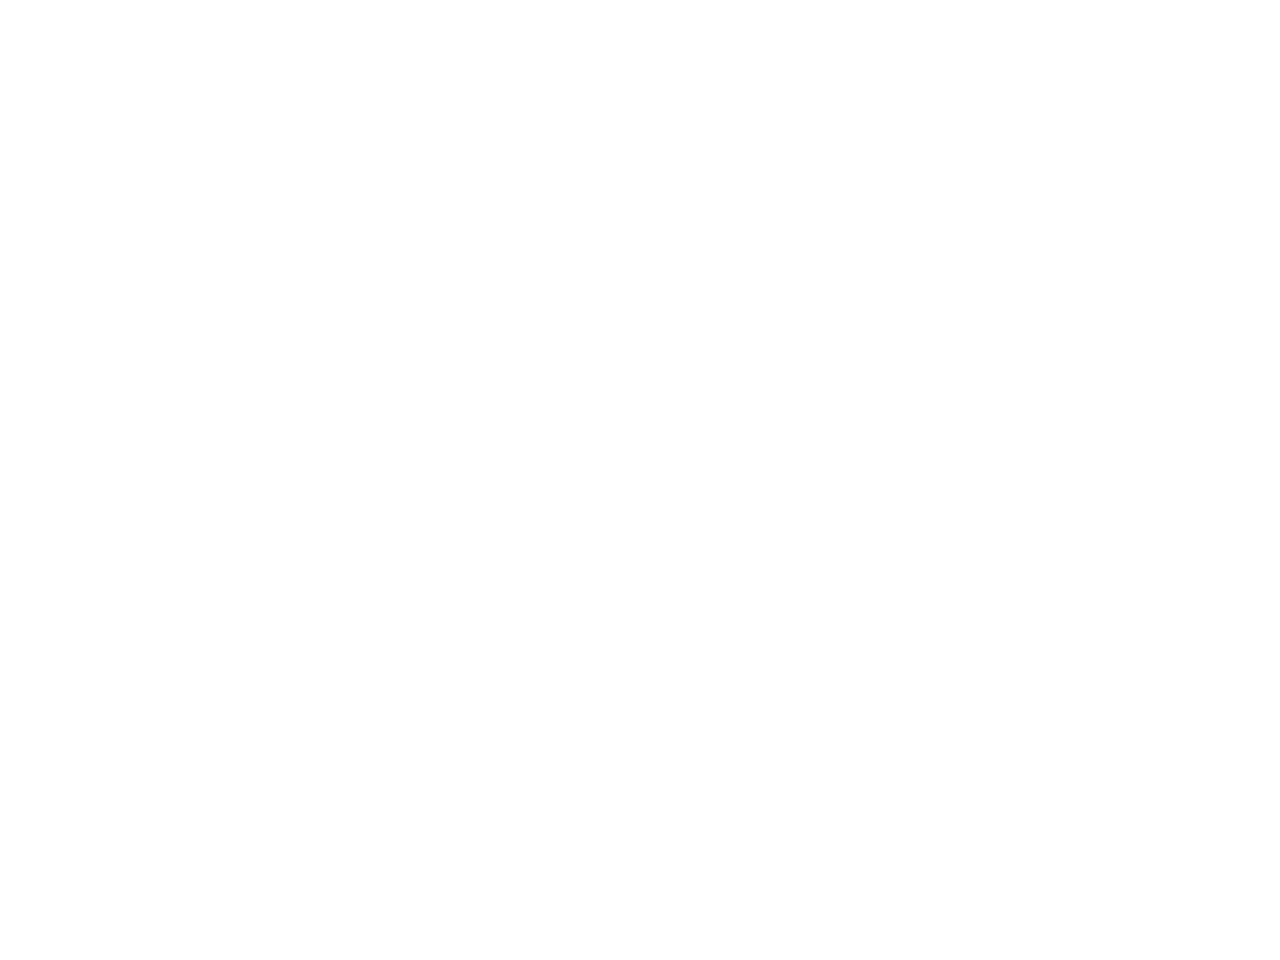

In [23]:
test_points(img_right2,pts_R2)

In [24]:
# homography from farthest right image to 2nd farthest 
# R2 is source, R1 destination

n = len(pts_R2)
a = np.zeros((n*2,8))
b = np.zeros((n*2,1))
A,B = a_matrix(a,b,n,pts_R2,pts_R1)
H = np.linalg.lstsq(A,B,rcond=None)
H = H[0]
H = np.append(H,[1])
H = np.resize(H,(3,3))
print(H)

H_test = cv2.findHomography(pts_R2,pts_R1)
H_test = H_test[0]
print(H_test)
im_out = cv2.warpPerspective(img_right2, H,(img_right1.shape[1],img_right1.shape[0]))

plt.


[[ 7.32735085e-01  4.70256784e-02  1.27107145e+02]
 [-1.61024917e-01  1.00906050e+00  1.03551702e+01]
 [-1.04053338e-03  2.57056693e-04  1.00000000e+00]]
[[ 7.32735085e-01  4.70256784e-02  1.27107145e+02]
 [-1.61024917e-01  1.00906050e+00  1.03551702e+01]
 [-1.04053338e-03  2.57056693e-04  1.00000000e+00]]


In [63]:
%matplotlib inline

def warp_corners(H,img_src,img_dst):
    
    h,w,c = img_src.shape
    h1,w1,c1 = img_dst.shape
    
    corners = np.array(
        [(0,0,1),
         (w,0,1),
         (w,h,1),
         (0,h,1)])
    
    print('corners \n',corners)
    
    corner_dst = np.array(
        [(0,0,1),
         (w1,0,1),
         (w1,h1,1),
         (0,h1,1)])

    corner_dst = np.transpose(corner_dst)
    
    corners = np.transpose(corners)
    print('src corners \n',corners)
    print('H matrix', H)
    
    warp_corners = np.matmul(H,corners)
    print('warp_corners \n', warp_corners)
    all_corners = np.hstack(((warp_corners),(corner_dst)))
    print('All corners \n', all_corners.astype(int))
    
    min_x = min(all_corners[0,:])
    min_y = min(all_corners[1,:])
    
    max_x = max(all_corners[0,:])
    max_y = max(all_corners[1,:])
    
    print(min_x,min_y)
    print(max_x,max_y)
    return (min_x,min_y,max_x,max_y)

In [65]:
#min max values of warped corners 
min_x, min_y, max_x, max_y = warp_corners(H,img_right1,img_right2)

shift_matrix = np.identity(3)
shift_matrix[0,2] = abs(min_x)
shift_matrix[1,2] = abs(min_y)
print('Shift matrix \n', shift_matrix.astype(int))

H_shift = np.matmul(shift_matrix, H)
print('H_shift \n', H_shift.astype(int))

image_size = np.array([(max_x-min_x),(max_y-min_y)]).astype(int)
print("Image size: " + str(image_size))
print("size: " + str(img_right1.shape))

test = np.eye(3)
test[2, 0]=1
test[2, 1]=1

test[0, 0] = 302
test[1, 1] = 302
print(test)
print(np.matmul(H, test))

corners 
 [[  0   0   1]
 [302   0   1]
 [302 403   1]
 [  0 403   1]]
src corners 
 [[  0 302 302   0]
 [  0   0 403 403]
 [  1   1   1   1]]
H matrix [[ 7.32735085e-01  4.70256784e-02  1.27107145e+02]
 [-1.61024917e-01  1.00906050e+00  1.03551702e+01]
 [-1.04053338e-03  2.57056693e-04  1.00000000e+00]]
warp_corners 
 [[127.10714496 348.39314061 367.34448902 146.05849338]
 [ 10.35517017 -38.27435466 368.37702563 417.00655046]
 [  1.           0.68575892   0.78935277   1.10359385]]
All corners 
 [[127 348 367 146   0 302 302   0]
 [ 10 -38 368 417   0   0 403 403]
 [  1   0   0   1   1   1   1   1]]
0.0 -38.27435466125385
367.3444890234281 417.0065504559318
Shift matrix 
 [[ 1  0  0]
 [ 0  1 38]
 [ 0  0  1]]
H_shift 
 [[  0   0 127]
 [  0   1  48]
 [  0   0   1]]
Image size: [367 455]
size: (403, 302, 3)
[[302.   0.   0.]
 [  0. 302.   0.]
 [  1.   1.   1.]]
[[348.39314061 141.30889985 127.10714496]
 [-38.27435466 315.09144026  10.35517017]
 [  0.68575892   1.07763112   1.        ]]


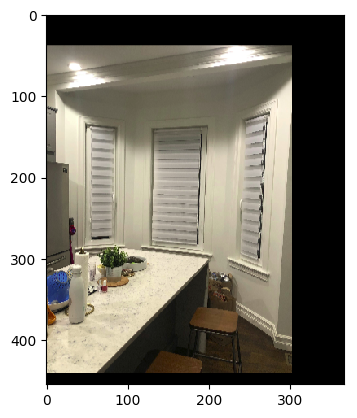

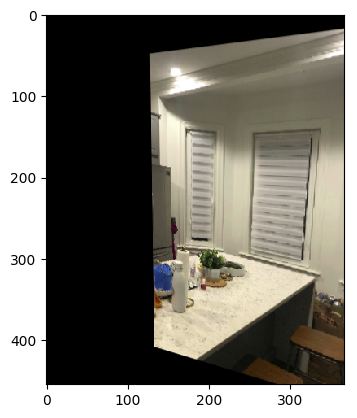

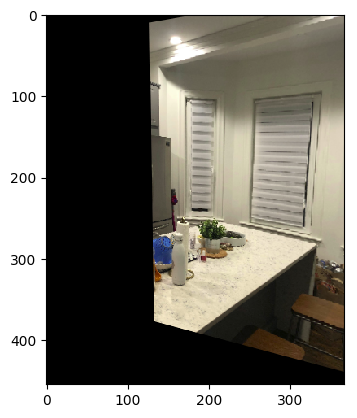

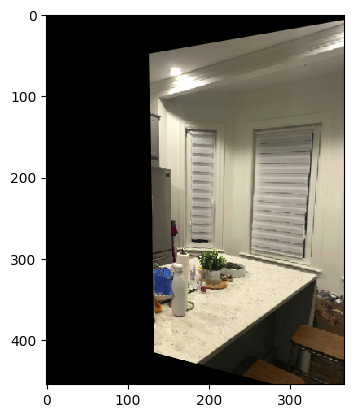

In [72]:
%matplotlib inline

plot.figure()
im_out=cv2.warpPerspective(img_right2, shift_matrix,(image_size[0],image_size[1]))
plot.imshow(im_out)

plot.figure()
im_out=cv2.warpPerspective(im_out, H,(image_size[0],image_size[1]))
plot.imshow(im_out)

plot.figure()
im_out=cv2.warpPerspective(img_right2, H,(image_size[0],image_size[1]))
plot.imshow(im_out)



plot.figure()
im_out=cv2.warpPerspective(img_right2, H_shift,(image_size[0],image_size[1]))
plot.imshow(im_out)

In [28]:
print(568-54)

514


In [29]:
 # start_p is denoted by f1
            f1 = np.dot(xh, np.array([0,0,1]))
            f1 = f1/f1[-1]
            # transforming the matrix 
            xh[0][-1] += abs(f1[0])
            xh[1][-1] += abs(f1[1])
            ds = np.dot(xh, np.array([a.shape[1], a.shape[0], 1]))
            offsety = abs(int(f1[1]))
            offsetx = abs(int(f1[0]))
            # dimension of warped image
            dsize = (int(ds[0])+offsetx, int(ds[1]) + offsety)
            print "image dsize =>", dsize
            tmp = cv2.warpPerspective(a, xh, dsize)
            # cv2.imshow("warped", tmp)
            # cv2.waitKey()
            tmp[offsety:b.shape[0]+offsety, offsetx:b.shape[1]+offsetx] = b
            a = tmp

IndentationError: unexpected indent (<ipython-input-29-657c63d53d09>, line 2)

In [ ]:
yy, xx = np.mgrid[0:im.shape[0], 0:im.shape[1]]

In [ ]:
find_size(H,img_right1)

In [ ]:
#im_out = cv2.warpPerspective(img_right1, H,(img_center.shape[1]*2,img_center.shape[0]))
im_out = cv2.warpPerspective(img_right1, H,(new_w,new_h))
plot.imshow(im_out)
im_out.shape

In [ ]:
im_out = cv2.drawMatches(i)

Harris corner detection

FEATURES
FEATURE MATCHER

cv2.findHomography(src,dst,RANSAC)
cv2.warp
cv2.blend them 